# Text Preprocessing for NLP

---

## Table of Contents
1. [Introduction to Text Preprocessing](#introduction)
2. [Basic Terminology](#terminology)
3. [Tokenization](#tokenization)
   - Word Tokenization
   - Sentence Tokenization
   - Custom Tokenization
4. [Text Normalization](#normalization)
   - Lowercasing
   - Removing Special Characters
   - Handling Numbers
5. [Stemming](#stemming)
   - Porter Stemmer
   - Snowball Stemmer
   - Lancaster Stemmer
6. [Lemmatization](#lemmatization)
7. [Stopwords Removal](#stopwords)
8. [Complete Preprocessing Pipeline](#pipeline)
9. [Real-World Example](#real-world)
10. [Best Practices](#best-practices)

---

## 1. Introduction to Text Preprocessing <a id='introduction'></a>

**Text preprocessing** is the crucial first step in any NLP pipeline. It involves transforming raw text into a clean, standardized format that machines can process effectively.

### Why is Preprocessing Important?

1. **Reduces Noise**: Removes irrelevant information
2. **Standardizes Text**: Ensures consistency (e.g., "Running", "running", "run" become similar)
3. **Reduces Vocabulary Size**: Makes models more efficient
4. **Improves Model Performance**: Clean data = better predictions

### Raw Text Challenges:

```python
"The QUICK brown fox!!! Jumped over the lazy dog... #amazing"
```

Issues:
- Mixed case ("QUICK" vs "quick")
- Punctuation (!!!, ...)
- Special characters (#)
- Different word forms ("Jumped" vs "jump")
- Stopwords ("the", "over")

In [1]:
# Setup: Import necessary libraries
import nltk
import spacy
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# NLTK imports
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Basic Terminology <a id='terminology'></a>

Before we dive into preprocessing techniques, let's understand key NLP terms:

### Core Concepts:

| Term | Definition | Example |
|------|------------|----------|
| **Corpus** | Collection of text documents | All Shakespeare plays |
| **Document** | Single piece of text | One Shakespeare play |
| **Token** | Individual unit of text | A word or punctuation mark |
| **Vocabulary** | Set of unique tokens | {"hello", "world", "nlp"} |
| **Lexicon** | Dictionary of words with meanings | English dictionary |
| **Stopwords** | Common words with little meaning | "the", "is", "at", "which" |
| **Stem** | Root form of a word (may not be valid) | "running" → "run" |
| **Lemma** | Base dictionary form of a word | "better" → "good" |
| **N-gram** | Sequence of N consecutive tokens | "New York" (bigram) |

In [2]:
# Example: Demonstrating basic terminology

# Corpus: Collection of documents
corpus = [
    "Natural Language Processing is fascinating.",
    "Machine Learning powers modern AI applications.",
    "Text preprocessing is the first step in NLP."
]

print("CORPUS (3 documents):")
for i, doc in enumerate(corpus, 1):
    print(f"  Document {i}: {doc}")

# Tokenize the first document
document = corpus[0]
tokens = word_tokenize(document)

print(f"\nDOCUMENT: {document}")
print(f"TOKENS: {tokens}")
print(f"Number of tokens: {len(tokens)}")

# Get all unique tokens (vocabulary) from entire corpus
all_tokens = []
for doc in corpus:
    all_tokens.extend(word_tokenize(doc.lower()))

vocabulary = set(all_tokens)
print(f"\nVOCABULARY SIZE: {len(vocabulary)} unique tokens")
print(f"VOCABULARY: {sorted(vocabulary)}")

CORPUS (3 documents):
  Document 1: Natural Language Processing is fascinating.
  Document 2: Machine Learning powers modern AI applications.
  Document 3: Text preprocessing is the first step in NLP.

DOCUMENT: Natural Language Processing is fascinating.
TOKENS: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.']
Number of tokens: 6

VOCABULARY SIZE: 19 unique tokens
VOCABULARY: ['.', 'ai', 'applications', 'fascinating', 'first', 'in', 'is', 'language', 'learning', 'machine', 'modern', 'natural', 'nlp', 'powers', 'preprocessing', 'processing', 'step', 'text', 'the']


## 3. Tokenization <a id='tokenization'></a>

**Tokenization** is the process of breaking text into smaller units called **tokens**.

### Types of Tokenization:
1. **Word Tokenization**: Split text into words
2. **Sentence Tokenization**: Split text into sentences
3. **Character Tokenization**: Split text into characters
4. **Subword Tokenization**: Split words into meaningful subunits

### Why Tokenization Matters:
- First step in text analysis
- Determines granularity of analysis
- Affects vocabulary size and model complexity

### 3.1 Word Tokenization

Split text into individual words (and punctuation marks).

In [3]:
# Example text with various challenges
text = """Dr. Smith's research on AI (Artificial Intelligence) is groundbreaking! 
He said, \"NLP is the future.\" Visit https://example.com for more info."""

print("ORIGINAL TEXT:")
print(text)
print("\n" + "="*80 + "\n")

# Method 1: NLTK's word_tokenize (most common)
# Uses Penn Treebank tokenization conventions
tokens_nltk = word_tokenize(text)
print("1. NLTK word_tokenize (Penn Treebank):")
print(f"   Tokens: {tokens_nltk}")
print(f"   Count: {len(tokens_nltk)} tokens\n")

# Method 2: TreebankWordTokenizer (explicit Penn Treebank)
tokenizer_treebank = TreebankWordTokenizer()
tokens_treebank = tokenizer_treebank.tokenize(text)
print("2. TreebankWordTokenizer:")
print(f"   Tokens: {tokens_treebank}")
print(f"   Count: {len(tokens_treebank)} tokens\n")

# Method 3: WordPunctTokenizer (splits all punctuation)
tokenizer_punct = WordPunctTokenizer()
tokens_punct = tokenizer_punct.tokenize(text)
print("3. WordPunctTokenizer:")
print(f"   Tokens: {tokens_punct}")
print(f"   Count: {len(tokens_punct)} tokens\n")

# Method 4: Simple split by whitespace (naive approach)
tokens_split = text.split()
print("4. Simple split() [NOT RECOMMENDED]:")
print(f"   Tokens: {tokens_split}")
print(f"   Count: {len(tokens_split)} tokens\n")

# Method 5: spaCy tokenizer (modern approach)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # Load only tokenizer
doc = nlp(text)
tokens_spacy = [token.text for token in doc]
print("5. spaCy tokenizer:")
print(f"   Tokens: {tokens_spacy}")
print(f"   Count: {len(tokens_spacy)} tokens")

ORIGINAL TEXT:
Dr. Smith's research on AI (Artificial Intelligence) is groundbreaking! 
He said, "NLP is the future." Visit https://example.com for more info.


1. NLTK word_tokenize (Penn Treebank):
   Tokens: ['Dr.', 'Smith', "'s", 'research', 'on', 'AI', '(', 'Artificial', 'Intelligence', ')', 'is', 'groundbreaking', '!', 'He', 'said', ',', '``', 'NLP', 'is', 'the', 'future', '.', "''", 'Visit', 'https', ':', '//example.com', 'for', 'more', 'info', '.']
   Count: 31 tokens

2. TreebankWordTokenizer:
   Tokens: ['Dr.', 'Smith', "'s", 'research', 'on', 'AI', '(', 'Artificial', 'Intelligence', ')', 'is', 'groundbreaking', '!', 'He', 'said', ',', '``', 'NLP', 'is', 'the', 'future.', "''", 'Visit', 'https', ':', '//example.com', 'for', 'more', 'info', '.']
   Count: 30 tokens

3. WordPunctTokenizer:
   Tokens: ['Dr', '.', 'Smith', "'", 's', 'research', 'on', 'AI', '(', 'Artificial', 'Intelligence', ')', 'is', 'groundbreaking', '!', 'He', 'said', ',', '"', 'NLP', 'is', 'the', 'future', '.

### 3.2 Sentence Tokenization

Split text into sentences - useful for tasks like summarization and machine translation.

In [5]:
# Example paragraph with multiple sentences
paragraph = """Natural Language Processing is a subfield of AI. It focuses on the 
interaction between computers and humans. Dr. Johnson's research showed promising 
results! However, challenges remain... What will the future hold? We'll find out soon."""

print("ORIGINAL PARAGRAPH:")
print(paragraph)
print("\n" + "="*80 + "\n")

# NLTK sentence tokenization
# Handles abbreviations like "Dr." correctly
sentences_nltk = sent_tokenize(paragraph)

print("NLTK Sentence Tokenization:")
print(f"Number of sentences: {len(sentences_nltk)}\n")

for i, sentence in enumerate(sentences_nltk, 1):
    print(f"Sentence {i}: {sentence.strip()}")

print("\n" + "="*80 + "\n")

ORIGINAL PARAGRAPH:
Natural Language Processing is a subfield of AI. It focuses on the 
interaction between computers and humans. Dr. Johnson's research showed promising 
results! However, challenges remain... What will the future hold? We'll find out soon.


NLTK Sentence Tokenization:
Number of sentences: 5

Sentence 1: Natural Language Processing is a subfield of AI.
Sentence 2: It focuses on the 
interaction between computers and humans.
Sentence 3: Dr. Johnson's research showed promising 
results!
Sentence 4: However, challenges remain... What will the future hold?
Sentence 5: We'll find out soon.




In [ ]:
# Spacy sentence tokenization
import spacy

nlp = spacy.load("en_core_web_sm")   # or spacy.blank("en")
if "sentencizer" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")      # adds rule-based sentence boundary detection

doc = nlp(paragraph)
sentences_spacy = [sent.text.strip() for sent in doc.sents]

print("spaCy Sentence Tokenization:")
print(f"Number of sentences: {len(sentences_spacy)}\n")

for i, sentence in enumerate(sentences_spacy, 1):
    print(f"Sentence {i}: {sentence}")

spaCy Sentence Tokenization:
Number of sentences: 6

Sentence 1: Natural Language Processing is a subfield of AI.
Sentence 2: It focuses on the 
interaction between computers and humans.
Sentence 3: Dr. Johnson's research showed promising 
results!
Sentence 4: However, challenges remain...
Sentence 5: What will the future hold?
Sentence 6: We'll find out soon.


### 3.3 Custom Tokenization with Regular Expressions

For specialized tasks, you might need custom tokenization rules.

In [7]:
import re

text = "Contact me at john.doe@email.com or call +1-555-123-4567. Price: $99.99!"

print("ORIGINAL TEXT:")
print(text)
print("\n" + "="*80 + "\n")

# Custom tokenizer 1: Extract only words (no punctuation or numbers)
words_only = re.findall(r'\b[a-zA-Z]+\b', text)
print("1. Words only (no punctuation/numbers):")
print(f"   {words_only}\n")

# Custom tokenizer 2: Extract words and numbers
words_and_numbers = re.findall(r'\b\w+\b', text)
print("2. Words and numbers:")
print(f"   {words_and_numbers}\n")

# Custom tokenizer 3: Extract emails
emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
print("3. Email addresses:")
print(f"   {emails}\n")

# Custom tokenizer 4: Extract phone numbers
phones = re.findall(r'\+?\d[\d -]{8,}\d', text)
print("4. Phone numbers:")
print(f"   {phones}\n")

# Custom tokenizer 5: Extract prices
prices = re.findall(r'\$\d+\.\d{2}', text)
print("5. Prices:")
print(f"   {prices}")

ORIGINAL TEXT:
Contact me at john.doe@email.com or call +1-555-123-4567. Price: $99.99!


1. Words only (no punctuation/numbers):
   ['Contact', 'me', 'at', 'john', 'doe', 'email', 'com', 'or', 'call', 'Price']

2. Words and numbers:
   ['Contact', 'me', 'at', 'john', 'doe', 'email', 'com', 'or', 'call', '1', '555', '123', '4567', 'Price', '99', '99']

3. Email addresses:
   ['john.doe@email.com']

4. Phone numbers:
   ['+1-555-123-4567']

5. Prices:
   ['$99.99']


## 4. Text Normalization <a id='normalization'></a>

Text normalization standardizes text to reduce variations and improve consistency.

### Common Normalization Techniques:
1. Lowercasing
2. Removing special characters
3. Removing or handling numbers
4. Removing extra whitespace
5. Handling contractions

In [8]:
# Example text with normalization challenges
messy_text = """   The PRICE is $299.99!!!   
I can't believe it's THIS cheap... @JohnDoe said: \"Amazing deal!\"   
Visit us @ https://example.com     #Sale2024   """

print("ORIGINAL TEXT:")
print(repr(messy_text))  # repr shows special characters
print("\n" + "="*80 + "\n")

# Step 1: Remove extra whitespace and newlines
text = ' '.join(messy_text.split())
print("Step 1 - Remove extra whitespace:")
print(repr(text))
print()

# Step 2: Convert to lowercase
text = text.lower()
print("Step 2 - Lowercase:")
print(repr(text))
print()

# Step 3: Remove URLs
text = re.sub(r'https?://\S+|www\.\S+', '', text)
print("Step 3 - Remove URLs:")
print(repr(text))
print()

# Step 4: Remove mentions and hashtags
text = re.sub(r'@\w+|#\w+', '', text)
print("Step 4 - Remove mentions and hashtags:")
print(repr(text))
print()

# Step 5: Remove special characters (keep only letters, numbers, and basic punctuation)
text = re.sub(r'[^a-zA-Z0-9\s.,!?\'\"]+', '', text)
print("Step 5 - Remove special characters:")
print(repr(text))
print()

# Step 6: Remove numbers (optional - depends on your use case)
text_no_numbers = re.sub(r'\d+', '', text)
print("Step 6 - Remove numbers (optional):")
print(repr(text_no_numbers))

ORIGINAL TEXT:
'   The PRICE is $299.99!!!   \nI can\'t believe it\'s THIS cheap... @JohnDoe said: "Amazing deal!"   \nVisit us @ https://example.com     #Sale2024   '


Step 1 - Remove extra whitespace:
'The PRICE is $299.99!!! I can\'t believe it\'s THIS cheap... @JohnDoe said: "Amazing deal!" Visit us @ https://example.com #Sale2024'

Step 2 - Lowercase:
'the price is $299.99!!! i can\'t believe it\'s this cheap... @johndoe said: "amazing deal!" visit us @ https://example.com #sale2024'

Step 3 - Remove URLs:
'the price is $299.99!!! i can\'t believe it\'s this cheap... @johndoe said: "amazing deal!" visit us @  #sale2024'

Step 4 - Remove mentions and hashtags:
'the price is $299.99!!! i can\'t believe it\'s this cheap...  said: "amazing deal!" visit us @  '

Step 5 - Remove special characters:
'the price is 299.99!!! i can\'t believe it\'s this cheap...  said "amazing deal!" visit us   '

Step 6 - Remove numbers (optional):
'the price is .!!! i can\'t believe it\'s this cheap...  

In [9]:
# Create a comprehensive normalization function

def normalize_text(text, 
                   lowercase=True,
                   remove_urls=True,
                   remove_mentions=True,
                   remove_hashtags=True,
                   remove_special_chars=True,
                   remove_numbers=False,
                   remove_extra_whitespace=True):
    """
    Comprehensive text normalization function.
    
    Args:
        text (str): Input text to normalize
        lowercase (bool): Convert to lowercase
        remove_urls (bool): Remove URLs
        remove_mentions (bool): Remove @mentions
        remove_hashtags (bool): Remove #hashtags
        remove_special_chars (bool): Remove special characters
        remove_numbers (bool): Remove numbers
        remove_extra_whitespace (bool): Remove extra spaces
    
    Returns:
        str: Normalized text
    """
    
    # Remove extra whitespace and newlines
    if remove_extra_whitespace:
        text = ' '.join(text.split())
    
    # Convert to lowercase
    if lowercase:
        text = text.lower()
    
    # Remove URLs
    if remove_urls:
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove mentions
    if remove_mentions:
        text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    if remove_hashtags:
        text = re.sub(r'#\w+', '', text)
    
    # Remove special characters
    if remove_special_chars:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove numbers
    if remove_numbers:
        text = re.sub(r'\d+', '', text)
    
    # Final whitespace cleanup
    if remove_extra_whitespace:
        text = ' '.join(text.split())
    
    return text

# Test the function
test_texts = [
    "Check out https://example.com for #AmazingDeals!!! @JohnDoe",
    "The price is $99.99 (was $199.99)... WOW!!!",
    "Contact: info@company.com or call 555-1234"
]

print("Testing normalization function:\n")
for text in test_texts:
    normalized = normalize_text(text, remove_numbers=False)
    print(f"Original:    {text}")
    print(f"Normalized:  {normalized}")
    print()

Testing normalization function:

Original:    Check out https://example.com for #AmazingDeals!!! @JohnDoe
Normalized:  check out for

Original:    The price is $99.99 (was $199.99)... WOW!!!
Normalized:  the price is 9999 was 19999 wow

Original:    Contact: info@company.com or call 555-1234
Normalized:  contact infocom or call 5551234



## 5. Stemming <a id='stemming'></a>

**Stemming** reduces words to their root/base form by removing suffixes.

### How Stemming Works:
- Uses rule-based algorithms
- Chops off word endings
- **Fast** but sometimes **inaccurate**
- Result may not be a valid word

### Examples:
- "running" → "run"
- "flies" → "fli"
- "better" → "better" (not "good")

### Popular Stemmers:
1. **Porter Stemmer**: Most common, moderate aggressiveness
2. **Snowball Stemmer**: Improved Porter, supports multiple languages
3. **Lancaster Stemmer**: Most aggressive, can over-stem

In [10]:
# Initialize different stemmers
porter = PorterStemmer()
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()

# Test words with different forms
words = [
    'running', 'runs', 'ran', 'runner',
    'happily', 'happiness', 'happy',
    'connection', 'connected', 'connecting', 'connects',
    'studies', 'studying', 'studied',
    'generously', 'generous', 'generosity',
    'probably', 'probable', 'probability'
]

# Create comparison DataFrame
stemming_results = []

for word in words:
    stemming_results.append({
        'Original': word,
        'Porter': porter.stem(word),
        'Snowball': snowball.stem(word),
        'Lancaster': lancaster.stem(word)
    })

df_stemming = pd.DataFrame(stemming_results)

print("Comparison of Different Stemmers:\n")
print(df_stemming.to_string(index=False))

Comparison of Different Stemmers:

   Original  Porter Snowball Lancaster
    running     run      run       run
       runs     run      run       run
        ran     ran      ran       ran
     runner  runner   runner       run
    happily happili  happili     happy
  happiness   happi    happi     happy
      happy   happi    happi     happy
 connection connect  connect   connect
  connected connect  connect   connect
 connecting connect  connect   connect
   connects connect  connect   connect
    studies   studi    studi     study
   studying   studi    studi     study
    studied   studi    studi     study
 generously   gener generous       gen
   generous   gener generous       gen
 generosity generos  generos   generos
   probably probabl  probabl      prob
   probable probabl  probabl      prob
probability probabl  probabl      prob


In [11]:
# Practical example: Stem a sentence

sentence = "The runners were running happily through the connected pathways."

print("ORIGINAL SENTENCE:")
print(sentence)
print("\n" + "="*80 + "\n")

# Tokenize first
tokens = word_tokenize(sentence.lower())
print(f"Tokens: {tokens}\n")

# Apply Porter Stemmer
stemmed_porter = [porter.stem(token) for token in tokens]
print("Porter Stemmer:")
print(f"Stemmed tokens: {stemmed_porter}")
print(f"Reconstructed: {' '.join(stemmed_porter)}")
print()

# Apply Snowball Stemmer
stemmed_snowball = [snowball.stem(token) for token in tokens]
print("Snowball Stemmer:")
print(f"Stemmed tokens: {stemmed_snowball}")
print(f"Reconstructed: {' '.join(stemmed_snowball)}")
print()

# Apply Lancaster Stemmer
stemmed_lancaster = [lancaster.stem(token) for token in tokens]
print("Lancaster Stemmer:")
print(f"Stemmed tokens: {stemmed_lancaster}")
print(f"Reconstructed: {' '.join(stemmed_lancaster)}")

ORIGINAL SENTENCE:
The runners were running happily through the connected pathways.


Tokens: ['the', 'runners', 'were', 'running', 'happily', 'through', 'the', 'connected', 'pathways', '.']

Porter Stemmer:
Stemmed tokens: ['the', 'runner', 'were', 'run', 'happili', 'through', 'the', 'connect', 'pathway', '.']
Reconstructed: the runner were run happili through the connect pathway .

Snowball Stemmer:
Stemmed tokens: ['the', 'runner', 'were', 'run', 'happili', 'through', 'the', 'connect', 'pathway', '.']
Reconstructed: the runner were run happili through the connect pathway .

Lancaster Stemmer:
Stemmed tokens: ['the', 'run', 'wer', 'run', 'happy', 'through', 'the', 'connect', 'pathway', '.']
Reconstructed: the run wer run happy through the connect pathway .


### Problems with Stemming

Stemming can be too aggressive or miss important distinctions:

In [12]:
# Examples of stemming issues

problematic_words = [
    'university', 'universe', 'universal',  # Different meanings, same stem
    'better', 'good',  # Should have same meaning, different stems
    'caring', 'car',  # 'caring' stems to 'car' in some stemmers
    'news', 'new',  # Different meanings
    'studies', 'study',  # Related but different forms
]

print("Potential Stemming Issues:\n")
print(f"{'Word':<15} {'Porter':<15} {'Snowball':<15} {'Lancaster':<15}")
print("="*60)

for word in problematic_words:
    print(f"{word:<15} {porter.stem(word):<15} {snowball.stem(word):<15} {lancaster.stem(word):<15}")

Potential Stemming Issues:

Word            Porter          Snowball        Lancaster      
university      univers         univers         univers        
universe        univers         univers         univers        
universal       univers         univers         univers        
better          better          better          bet            
good            good            good            good           
caring          care            care            car            
car             car             car             car            
news            news            news            new            
new             new             new             new            
studies         studi           studi           study          
study           studi           studi           study          


## 6. Lemmatization <a id='lemmatization'></a>

**Lemmatization** reduces words to their dictionary base form (lemma) using vocabulary and morphological analysis.

### Lemmatization vs Stemming:

| Aspect | Stemming | Lemmatization |
|--------|----------|---------------|
| **Method** | Rule-based chopping | Dictionary lookup + morphology |
| **Speed** | Fast | Slower |
| **Accuracy** | Lower | Higher |
| **Output** | May not be real word | Always a valid word |
| **Example** | "studies" → "studi" | "studies" → "study" |
| **Example** | "better" → "better" | "better" → "good" |

### When to Use What:
- **Stemming**: Speed is critical, approximate matching is okay (e.g., search engines)
- **Lemmatization**: Accuracy is important, need valid words (e.g., chatbots, translation)

In [13]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Test words
test_words = [
    'running', 'runs', 'ran',
    'better', 'best', 'good',
    'caring', 'cared', 'cares',
    'studies', 'studying', 'studied',
    'mice', 'geese', 'children',
    'was', 'is', 'are', 'been',
]

print("Stemming vs Lemmatization Comparison:\n")
print(f"{'Word':<15} {'Porter Stem':<15} {'Lemma':<15}")
print("="*45)

for word in test_words:
    stem = porter.stem(word)
    lemma = lemmatizer.lemmatize(word)
    print(f"{word:<15} {stem:<15} {lemma:<15}")

Stemming vs Lemmatization Comparison:

Word            Porter Stem     Lemma          
running         run             running        
runs            run             run            
ran             ran             ran            
better          better          better         
best            best            best           
good            good            good           
caring          care            caring         
cared           care            cared          
cares           care            care           
studies         studi           study          
studying        studi           studying       
studied         studi           studied        
mice            mice            mouse          
geese           gees            goose          
children        children        child          
was             wa              wa             
is              is              is             
are             are             are            
been            been            been           


### POS-aware Lemmatization

Lemmatization works better when we provide the Part-of-Speech (POS) tag:

In [14]:
# Example showing importance of POS tags in lemmatization

word = "better"

print(f"Word: '{word}'\n")

# Without POS tag (defaults to noun)
lemma_default = lemmatizer.lemmatize(word)
print(f"Without POS: {lemma_default}")

# With POS tag as adjective
lemma_adj = lemmatizer.lemmatize(word, pos='a')  # 'a' for adjective
print(f"As adjective: {lemma_adj}")

print("\n" + "="*60 + "\n")

# More examples
examples = [
    ('running', 'v'),  # verb
    ('running', 'n'),  # noun
    ('better', 'a'),   # adjective
    ('caring', 'v'),   # verb
    ('caring', 'a'),   # adjective
]

print(f"{'Word':<15} {'POS':<10} {'Lemma':<15}")
print("="*40)

for word, pos in examples:
    lemma = lemmatizer.lemmatize(word, pos=pos)
    pos_name = {'v': 'verb', 'n': 'noun', 'a': 'adjective'}[pos]
    print(f"{word:<15} {pos_name:<10} {lemma:<15}")

Word: 'better'

Without POS: better
As adjective: good


Word            POS        Lemma          
running         verb       run            
running         noun       running        
better          adjective  good           
caring          verb       care           
caring          adjective  caring         


In [15]:
# Automatic POS tagging + Lemmatization
from nltk import pos_tag

def get_wordnet_pos(treebank_tag):
    """
    Convert Penn Treebank POS tags to WordNet POS tags.
    WordNet uses: 'n' (noun), 'v' (verb), 'a' (adjective), 'r' (adverb)
    """
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

def lemmatize_with_pos(text):
    """
    Lemmatize text with automatic POS tagging.
    
    Args:
        text (str): Input text
    
    Returns:
        list: List of lemmatized tokens
    """
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # POS tag
    pos_tags = pos_tag(tokens)
    
    # Lemmatize with POS
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos)) 
        for word, pos in pos_tags
    ]
    
    return lemmatized

# Test the function
sentence = "The striped bats are hanging on their feet for best sleep."

print("SENTENCE:", sentence)
print("\nTokens:", word_tokenize(sentence.lower()))
print("\nLemmatized (no POS):", [lemmatizer.lemmatize(w) for w in word_tokenize(sentence.lower())])
print("\nLemmatized (with POS):", lemmatize_with_pos(sentence))

SENTENCE: The striped bats are hanging on their feet for best sleep.

Tokens: ['the', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best', 'sleep', '.']

Lemmatized (no POS): ['the', 'striped', 'bat', 'are', 'hanging', 'on', 'their', 'foot', 'for', 'best', 'sleep', '.']

Lemmatized (with POS): ['the', 'striped', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best', 'sleep', '.']


## 7. Stopwords Removal <a id='stopwords'></a>

**Stopwords** are common words that typically don't carry much meaning:
- Articles: "a", "an", "the"
- Prepositions: "in", "on", "at"
- Pronouns: "I", "you", "he", "she"
- Conjunctions: "and", "but", "or"

### Why Remove Stopwords?
1. **Reduce vocabulary size**: Fewer unique words to process
2. **Focus on meaningful words**: Improve signal-to-noise ratio
3. **Improve performance**: Faster processing
4. **Better features**: More discriminative features for ML

### When NOT to Remove Stopwords:
- Machine translation
- Question answering ("who", "what", "where" are important)
- Sentiment analysis ("not", "but" affect sentiment)
- Text generation

In [16]:
# Explore NLTK's English stopwords
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

print(f"Total stopwords in NLTK English: {len(stop_words)}\n")

# Display some stopwords
print("Sample stopwords:")
print(sorted(list(stop_words))[:50])

print("\n" + "="*60 + "\n")

# Check specific words
test_words = ['the', 'hello', 'not', 'python', 'very', 'computer']
print("Is it a stopword?\n")
for word in test_words:
    is_stop = word in stop_words
    print(f"  '{word}': {is_stop}")

Total stopwords in NLTK English: 198

Sample stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn']


Is it a stopword?

  'the': True
  'hello': False
  'not': True
  'python': False
  'very': True
  'computer': False


In [17]:
# Remove stopwords from text

text = """Natural Language Processing is a subfield of artificial intelligence 
that focuses on the interaction between computers and humans through natural language."""

print("ORIGINAL TEXT:")
print(text)
print("\n" + "="*80 + "\n")

# Tokenize
tokens = word_tokenize(text.lower())
print(f"Total tokens: {len(tokens)}")
print(f"Tokens: {tokens}\n")

# Remove stopwords and punctuation
filtered_tokens = [
    word for word in tokens 
    if word not in stop_words and word.isalpha()  # isalpha() removes punctuation
]

print(f"Tokens after stopword removal: {len(filtered_tokens)}")
print(f"Filtered: {filtered_tokens}\n")

# Show removed words
removed_words = [word for word in tokens if word not in filtered_tokens]
print(f"Removed words: {removed_words}")

# Reconstruct text
print("\n" + "="*80 + "\n")
print("RECONSTRUCTED TEXT (without stopwords):")
print(' '.join(filtered_tokens))

ORIGINAL TEXT:
Natural Language Processing is a subfield of artificial intelligence 
that focuses on the interaction between computers and humans through natural language.


Total tokens: 22
Tokens: ['natural', 'language', 'processing', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language', '.']

Tokens after stopword removal: 12
Filtered: ['natural', 'language', 'processing', 'subfield', 'artificial', 'intelligence', 'focuses', 'interaction', 'computers', 'humans', 'natural', 'language']

Removed words: ['is', 'a', 'of', 'that', 'on', 'the', 'between', 'and', 'through', '.']


RECONSTRUCTED TEXT (without stopwords):
natural language processing subfield artificial intelligence focuses interaction computers humans natural language


In [18]:
# Custom stopwords list
# Sometimes you need to add domain-specific stopwords

# Start with NLTK stopwords
custom_stopwords = set(stopwords.words('english'))

# Add domain-specific stopwords (e.g., for product reviews)
domain_stops = {'product', 'item', 'purchase', 'bought', 'order'}
custom_stopwords.update(domain_stops)

# Or remove certain stopwords that might be important
# (e.g., for sentiment analysis, keep negations)
important_words = {'not', 'no', 'nor', 'neither', 'never', 'none'}
custom_stopwords -= important_words  # Remove from stopwords

print("Custom Stopwords Configuration:\n")
print(f"Original NLTK stopwords: {len(stopwords.words('english'))}")
print(f"Added domain stopwords: {len(domain_stops)}")
print(f"Removed important words: {len(important_words)}")
print(f"Total custom stopwords: {len(custom_stopwords)}")

print("\n" + "="*60 + "\n")

# Test with sentiment-bearing sentence
review = "This product is not good. I will never buy this item again."

tokens = word_tokenize(review.lower())

# With standard stopwords (removes 'not' and 'never')
standard_filtered = [w for w in tokens if w not in stop_words and w.isalpha()]

# With custom stopwords (keeps 'not' and 'never')
custom_filtered = [w for w in tokens if w not in custom_stopwords and w.isalpha()]

print("Original:", review)
print(f"\nStandard stopwords: {' '.join(standard_filtered)}")
print(f"Custom stopwords:   {' '.join(custom_filtered)}")
print("\nNotice: Custom version keeps 'not' and 'never' but removes 'product' and 'item'")

Custom Stopwords Configuration:

Original NLTK stopwords: 198
Added domain stopwords: 5
Removed important words: 6
Total custom stopwords: 200


Original: This product is not good. I will never buy this item again.

Standard stopwords: product good never buy item
Custom stopwords:   not good never buy

Notice: Custom version keeps 'not' and 'never' but removes 'product' and 'item'


## 8. Complete Preprocessing Pipeline <a id='pipeline'></a>

Let's combine everything into a comprehensive preprocessing pipeline.

In [19]:
def preprocess_text_pipeline(text, 
                             lowercase=True,
                             remove_urls=True,
                             remove_mentions=True,
                             remove_hashtags=True,
                             remove_numbers=False,
                             remove_punctuation=True,
                             remove_stopwords=True,
                             stemming=False,
                             lemmatization=True,
                             use_pos_tagging=True):
    """
    Complete text preprocessing pipeline.
    
    Args:
        text (str): Input text
        lowercase (bool): Convert to lowercase
        remove_urls (bool): Remove URLs
        remove_mentions (bool): Remove @mentions
        remove_hashtags (bool): Remove #hashtags
        remove_numbers (bool): Remove numbers
        remove_punctuation (bool): Remove punctuation
        remove_stopwords (bool): Remove stopwords
        stemming (bool): Apply stemming
        lemmatization (bool): Apply lemmatization
        use_pos_tagging (bool): Use POS tagging for lemmatization
    
    Returns:
        str: Preprocessed text
    """
    
    # Step 1: Normalize whitespace
    text = ' '.join(text.split())
    
    # Step 2: Remove URLs
    if remove_urls:
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Step 3: Remove mentions and hashtags
    if remove_mentions:
        text = re.sub(r'@\w+', '', text)
    if remove_hashtags:
        text = re.sub(r'#\w+', '', text)
    
    # Step 4: Lowercase
    if lowercase:
        text = text.lower()
    
    # Step 5: Tokenize
    tokens = word_tokenize(text)
    
    # Step 6: Remove numbers
    if remove_numbers:
        tokens = [token for token in tokens if not token.isdigit()]
    
    # Step 7: Remove punctuation
    if remove_punctuation:
        tokens = [token for token in tokens if token.isalnum()]
    
    # Step 8: Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    # Step 9: Stemming or Lemmatization
    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    elif lemmatization:
        if use_pos_tagging:
            # POS-aware lemmatization
            pos_tags = pos_tag(tokens)
            tokens = [
                lemmatizer.lemmatize(word, get_wordnet_pos(pos)) 
                for word, pos in pos_tags
            ]
        else:
            # Simple lemmatization
            tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Step 10: Join back to string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Test the pipeline
test_text = """Hey @JohnDoe! Check out this AMAZING article on #NLP at 
https://example.com. I'm studying Machine Learning and it's fascinating! 
The researchers were running experiments with 1000+ datasets."""

print("ORIGINAL TEXT:")
print(test_text)
print("\n" + "="*80 + "\n")

# Apply preprocessing with different configurations
configs = [
    {"name": "Minimal (just lowercase + tokenize)", 
     "params": {"remove_stopwords": False, "lemmatization": False}},
    
    {"name": "Standard (remove stopwords + lemmatize)", 
     "params": {}},
    
    {"name": "Aggressive (everything + stemming)", 
     "params": {"remove_numbers": True, "lemmatization": False, "stemming": True}},
]

for config in configs:
    result = preprocess_text_pipeline(test_text, **config["params"])
    print(f"{config['name']}:")
    print(f"  {result}")
    print()

ORIGINAL TEXT:
Hey @JohnDoe! Check out this AMAZING article on #NLP at 
https://example.com. I'm studying Machine Learning and it's fascinating! 
The researchers were running experiments with 1000+ datasets.


Minimal (just lowercase + tokenize):
  hey check out this amazing article on at i studying machine learning and it fascinating the researchers were running experiments with datasets

Standard (remove stopwords + lemmatize):
  hey check amaze article study machine learn fascinating researcher run experiment datasets

Aggressive (everything + stemming):
  hey check amaz articl studi machin learn fascin research run experi dataset



## 9. Real-World Example: Preprocessing Movie Reviews <a id='real-world'></a>

Let's apply preprocessing to a realistic dataset of movie reviews.

In [20]:
# Sample movie reviews (simulating real data)
reviews = [
    "This movie was ABSOLUTELY AMAZING!!! Best film I've seen in years! #MustWatch",
    "Terrible waste of time... The acting was horrible and the plot made no sense whatsoever.",
    "Pretty good overall, though the ending could've been better. I'd give it 7/10.",
    "OMG!!! @DirectorName you've outdone yourself! This is PERFECTION! https://moviereview.com/review",
    "Not bad, not great. Just okay. Wouldn't watch it again but didn't hate it either.",
    "The cinematography was stunning! However, the storyline was quite predictable. Mixed feelings..."
]

sentiments = ['positive', 'negative', 'neutral', 'positive', 'neutral', 'neutral']

# Create DataFrame
df_reviews = pd.DataFrame({
    'review': reviews,
    'sentiment': sentiments
})

print("Original Reviews:")
print("="*80)
for idx, row in df_reviews.iterrows():
    print(f"\n{idx+1}. [{row['sentiment'].upper()}]")
    print(f"   {row['review']}")

Original Reviews:

1. [POSITIVE]
   This movie was ABSOLUTELY AMAZING!!! Best film I've seen in years! #MustWatch

2. [NEGATIVE]
   Terrible waste of time... The acting was horrible and the plot made no sense whatsoever.

3. [NEUTRAL]
   Pretty good overall, though the ending could've been better. I'd give it 7/10.

4. [POSITIVE]
   OMG!!! @DirectorName you've outdone yourself! This is PERFECTION! https://moviereview.com/review

5. [NEUTRAL]
   Not bad, not great. Just okay. Wouldn't watch it again but didn't hate it either.

6. [NEUTRAL]
   The cinematography was stunning! However, the storyline was quite predictable. Mixed feelings...


In [21]:
# Apply preprocessing pipeline
df_reviews['preprocessed'] = df_reviews['review'].apply(
    lambda x: preprocess_text_pipeline(x, remove_numbers=True)
)

print("\nBefore and After Preprocessing:")
print("="*80)

for idx, row in df_reviews.iterrows():
    print(f"\nReview {idx+1}:")
    print(f"Before: {row['review']}")
    print(f"After:  {row['preprocessed']}")
    print("-"*80)


Before and After Preprocessing:

Review 1:
Before: This movie was ABSOLUTELY AMAZING!!! Best film I've seen in years! #MustWatch
After:  movie absolutely amazing best film see year
--------------------------------------------------------------------------------

Review 2:
Before: Terrible waste of time... The acting was horrible and the plot made no sense whatsoever.
After:  terrible waste time act horrible plot make sense whatsoever
--------------------------------------------------------------------------------

Review 3:
Before: Pretty good overall, though the ending could've been better. I'd give it 7/10.
After:  pretty good overall though end could well give
--------------------------------------------------------------------------------

Review 4:
Before: OMG!!! @DirectorName you've outdone yourself! This is PERFECTION! https://moviereview.com/review
After:  omg outdone perfection
--------------------------------------------------------------------------------

Review 5:
Before:

In [22]:
# Analyze vocabulary reduction

# Get all tokens from original reviews
original_tokens = []
for review in df_reviews['review']:
    original_tokens.extend(word_tokenize(review.lower()))

# Get all tokens from preprocessed reviews
preprocessed_tokens = []
for review in df_reviews['preprocessed']:
    preprocessed_tokens.extend(review.split())

# Calculate statistics
stats = {
    'Original': {
        'Total tokens': len(original_tokens),
        'Unique tokens': len(set(original_tokens)),
        'Avg tokens per review': len(original_tokens) / len(df_reviews)
    },
    'Preprocessed': {
        'Total tokens': len(preprocessed_tokens),
        'Unique tokens': len(set(preprocessed_tokens)),
        'Avg tokens per review': len(preprocessed_tokens) / len(df_reviews)
    }
}

# Display statistics
print("Vocabulary Statistics:")
print("="*60)
df_stats = pd.DataFrame(stats).T
print(df_stats)

print(f"\nReduction in unique tokens: {stats['Original']['Unique tokens'] - stats['Preprocessed']['Unique tokens']} "
      f"({(1 - stats['Preprocessed']['Unique tokens']/stats['Original']['Unique tokens'])*100:.1f}% decrease)")

Vocabulary Statistics:
              Total tokens  Unique tokens  Avg tokens per review
Original             108.0           75.0                   18.0
Preprocessed          42.0           42.0                    7.0

Reduction in unique tokens: 33 (44.0% decrease)


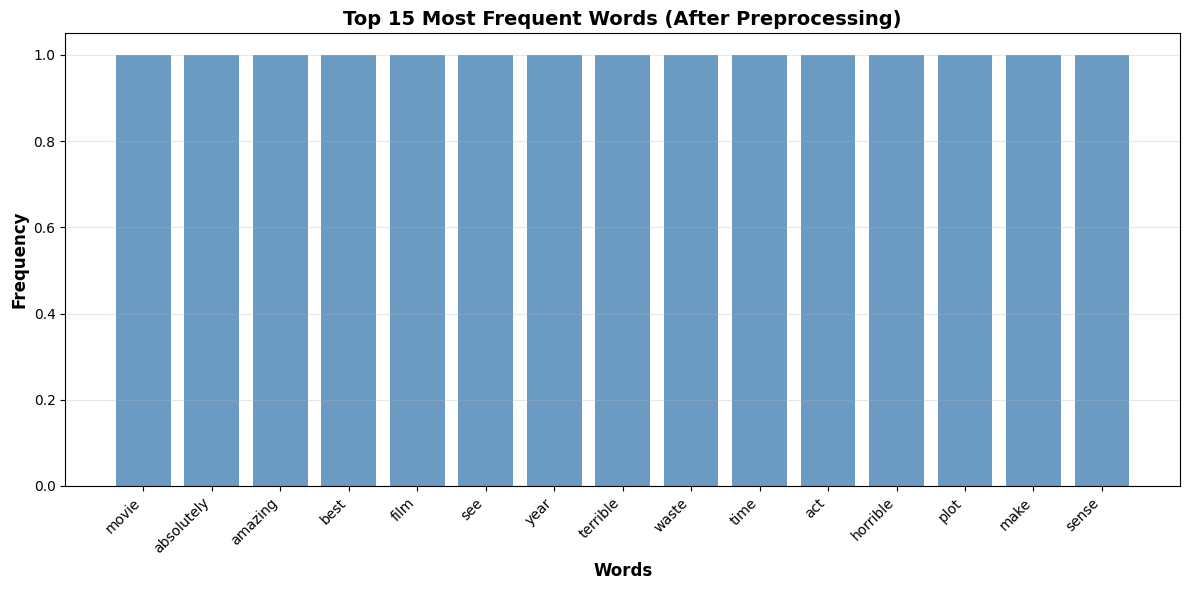


Most Common Words:
  movie: 1
  absolutely: 1
  amazing: 1
  best: 1
  film: 1
  see: 1
  year: 1
  terrible: 1
  waste: 1
  time: 1
  act: 1
  horrible: 1
  plot: 1
  make: 1
  sense: 1


In [23]:
# Visualize most common words

# Count word frequencies
word_freq = Counter(preprocessed_tokens)
most_common = word_freq.most_common(15)

# Create visualization
words, frequencies = zip(*most_common)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='steelblue', alpha=0.8)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Frequent Words (After Preprocessing)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMost Common Words:")
for word, freq in most_common:
    print(f"  {word}: {freq}")

## 10. Best Practices <a id='best-practices'></a>

### General Guidelines:

1. **Understand Your Task**
   - Different tasks need different preprocessing
   - Sentiment analysis: Keep negations ("not", "never")
   - Topic modeling: Aggressive preprocessing is okay
   - Named Entity Recognition: Minimal preprocessing

2. **Order Matters**
   ```
   Correct order:
   1. Remove URLs, mentions
   2. Lowercase
   3. Tokenize
   4. Remove punctuation
   5. Remove stopwords
   6. Stemming/Lemmatization
   ```

3. **Don't Over-preprocess**
   - More preprocessing ≠ better results
   - Can lose important information
   - Test different configurations

4. **Document Your Pipeline**
   - Keep track of preprocessing steps
   - Ensure reproducibility
   - Version your preprocessing code

5. **Consider Context**
   - Domain-specific terms might look like errors
   - Create custom stopword lists
   - Preserve important symbols (e.g., $ for prices)

### Common Mistakes to Avoid:

❌ **Don't**: Remove all punctuation in sentiment analysis  
✅ **Do**: Keep punctuation that affects meaning (!!!, ...)

❌ **Don't**: Use aggressive stemming for production chatbots  
✅ **Do**: Use lemmatization to maintain readability

❌ **Don't**: Remove all numbers blindly  
✅ **Do**: Consider if numbers are meaningful (prices, dates)

❌ **Don't**: Apply same preprocessing to all languages  
✅ **Do**: Use language-specific tools and stopwords

❌ **Don't**: Lowercase everything for NER  
✅ **Do**: Preserve case for proper nouns

## Summary

In this notebook, we covered:

✅ **Basic Terminology**: Corpus, tokens, vocabulary, etc.  
✅ **Tokenization**: Word, sentence, and custom tokenization  
✅ **Text Normalization**: Lowercasing, removing special characters  
✅ **Stemming**: Porter, Snowball, Lancaster stemmers  
✅ **Lemmatization**: Dictionary-based normalization with POS tagging  
✅ **Stopwords**: Removal and customization  
✅ **Complete Pipeline**: End-to-end preprocessing function  
✅ **Real-World Example**: Movie review preprocessing  
✅ **Best Practices**: Guidelines for effective preprocessing

### Key Takeaways:

1. **Preprocessing is essential** but should be task-appropriate
2. **Lemmatization > Stemming** for most modern applications
3. **Custom pipelines** work better than one-size-fits-all
4. **Experiment** with different configurations

---

**Next Notebook**: `02_Text_Representation.ipynb` - Convert preprocessed text into numerical features

---